## Exploratory and Data Analysis 

In [ ]:
ci

Primero exportaremosmos las bases a ocupar. Para ello tenemos 5 bases con extensión csv. Las bases a utilizar son las siguientes: 

- 2016.csv
- 2017.csv
- 2018.csv
- 2019.csv
- 2020.csv

In [ ]:
import pandas as pd

df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')
df_2020 = pd.read_csv('2020.csv')

df_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [ ]:
df_2020.head(2)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741


Comparemos el nombre de las columnas para todas las bases para saber si tienen la misma estructura.

In [ ]:
df_2016.columns.to_list() == df_2017.columns.to_list()

False

Acabamos de comparar la base 2016 con la 2017 y la igualdad nos da `False` por lo que será necesario buscar porque no son iguales y definir como podemos convalidar todas las bases.

In [ ]:
len(df_2016.columns.to_list()) , len(df_2017.columns.to_list()) ,len(df_2018.columns.to_list()) , len(df_2019.columns.to_list()) , len(df_2020.columns.to_list()) 

(13, 12, 9, 9, 20)

In [ ]:
df_2018.columns.to_list() == df_2019.columns.to_list()

True

Las bases de `2018` y `2019` están iguales, por lo tanto, se tomará este formato de base para las demás bases de datos. Partiremos encontrando las diferencias de esta base versus las otras.

In [ ]:
# Primero pasaremos todas las columnas de las bases a listas y para comparar el vector de columnas importaremos el módulo numpy 

import numpy as np

l_2016 = df_2016.columns.to_list()
l_2017 = df_2017.columns.to_list()
l_2018 = df_2018.columns.to_list()
l_2019 = df_2019.columns.to_list()
l_2020 = df_2020.columns.to_list()


In [ ]:
# Segundo haremos un for una función para saber si los elementos de los nombres de las columnas en el 2018 o 2019 están en los otros datasets

def val_listas( i , j ):
  lista = []
  for a in l_2018:
    if a in i:
      lista.append('True')
    else: 
      lista.append('False')
  print('Lista 2018 compara con {0}'.format(j),lista)


In [ ]:
bases = [ l_2016 , l_2017 , l_2020]
años = ['2016', '2017' , '2020']
for i , j in zip(bases,años):

  val_listas(i,j)

Lista 2018 compara con 2016 ['False', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'False']
Lista 2018 compara con 2017 ['False', 'False', 'False', 'False', 'False', 'False', 'False', 'True', 'False']
Lista 2018 compara con 2020 ['False', 'False', 'False', 'False', 'True', 'True', 'True', 'True', 'True']


Partiremos entonces por renombrar las columnas o encontrar si podemos renombrarlas correctamente

In [ ]:
# Limpiando las columnas para el df_2016

df_2016.drop([ 'Region' , 'Lower Confidence Interval' , 'Upper Confidence Interval' , 'Dystopia Residual' ], axis=1, inplace=True)
print(len(df_2016.columns))
df_2016.head()


9


,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [ ]:
# Limpiando las columnas para el df_2017

df_2017.drop([  'Whisker.high' , 'Whisker.low' , 'Dystopia.Residual' ], axis=1, inplace=True)
len(df_2017.columns)

9

In [ ]:
# Limpiando las columnas para el df_2020

df_2020.drop([ 'Social support','Perceptions of corruption','Freedom to make life choices','Generosity','Healthy life expectancy','Logged GDP per capita','Regional indicator' , 'Standard error of ladder score' , 'upperwhisker' , 'lowerwhisker' , 'Ladder score in Dystopia','Dystopia + residual'], axis=1, inplace=True)
df_2020.head(1)

,Country name,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.8087,1.28519,1.499526,0.961271,0.662317,0.15967,0.477857


In [ ]:
print(len(df_2020.columns))
df_2020.head(1)

8


,Country name,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.8087,1.28519,1.499526,0.961271,0.662317,0.15967,0.477857


In [ ]:
df_2018.head(1)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


In [ ]:
df_2016.drop(['Happiness Rank'], axis=1, inplace=True)
df_2017.drop(['Happiness.Rank'], axis=1, inplace=True)
df_2018.drop(['Overall rank'], axis=1, inplace=True)
df_2019.drop(['Overall rank'], axis=1, inplace=True)


In [ ]:
print(len(df_2016.columns))
print(len(df_2017.columns))
print(len(df_2018.columns))
print(len(df_2019.columns))
print(len(df_2020.columns))

8
8
8
8
8


In [ ]:
# Renombremos las columnas ahora antes de hacer el join

# Base 2016
df_2016.rename(columns={'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'GDP' , 'Health (Life Expectancy)': 'Life Expectancy' , 'Trust (Government Corruption)':'Trust (Corruption)' }, inplace=True)

# Base 2017
df_2017.rename(columns={'Happiness.Score': 'Score', 'Economy..GDP.per.Capita.': 'GDP' , 'Health..Life.Expectancy.': 'Life Expectancy' , 'Trust..Government.Corruption.':'Trust (Corruption)' }, inplace=True)

# Base 2018

df_2018.rename(columns={'Country or region': 'Country', 'GDP per capita': 'GDP' , 'Social support':'Family' , 'Freedom to make life choices':'Freedom' ,'Healthy life expectancy': 'Life Expectancy' , 'Perceptions of corruption':'Trust (Corruption)' }, inplace=True)

# Base 2019 

df_2019.rename(columns={'Country or region': 'Country', 'GDP per capita': 'GDP' , 'Social support':'Family' , 'Freedom to make life choices':'Freedom' ,'Healthy life expectancy': 'Life Expectancy' , 'Perceptions of corruption':'Trust (Corruption)' }, inplace=True)

# Base 2020

df_2020.rename(columns={'Country name': 'Country', 'Ladder Score': 'Score' ,'Explained by: Log GDP per capita': 'GDP' , 'Explained by: Social support': 'Family', 'Explained by: Healthy life expectancy':'Life Expectancy' ,'Explained by: Freedom to make life choices': 'Freedom' , 'Perceptions of corruption':'Trust (Corruption)','Explained by: Generosity':'Generosity','Explained by: Perceptions of corruption':'Trust (Corruption)','Ladder score':'Score'}, inplace=True)


In [ ]:
df_2016

,Country,Score,GDP,Family,Life Expectancy,Freedom,Trust (Corruption),Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
...,...,...,...,...,...,...,...,...
152,Benin,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180
153,Afghanistan,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268
154,Togo,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517
155,Syria,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397


In [ ]:
df_2017

,Country,Score,GDP,Family,Life Expectancy,Freedom,Generosity,Trust (Corruption)
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612
...,...,...,...,...,...,...,...,...
150,Rwanda,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220
151,Syria,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347
152,Tanzania,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035
153,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148


In [ ]:
df_2018

,Country,Score,GDP,Family,Life Expectancy,Freedom,Generosity,Trust (Corruption)
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...
151,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [ ]:
df_2019

,Country,Score,GDP,Family,Life Expectancy,Freedom,Generosity,Trust (Corruption)
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
df_2020

,Country,Score,GDP,Family,Life Expectancy,Freedom,Generosity,Trust (Corruption)
0,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
...,...,...,...,...,...,...,...,...
148,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265
149,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
150,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
151,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157


In [ ]:
# Agregaramos el indicador de columnas para cada dataset

df_2016['Year'] = '2016'
df_2017['Year'] = '2017'
df_2018['Year'] = '2018'
df_2019['Year'] = '2019'
df_2020['Year'] = '2020'




In [ ]:
frames = [df_2016 , df_2017 , df_2018 , df_2019 , df_2020]

base_final = pd.concat(frames , ignore_index=True)

base_final

,Country,Score,GDP,Family,Life Expectancy,Freedom,Trust (Corruption),Generosity,Year
0,Denmark,7.5260,1.441780,1.163740,0.795040,0.579410,0.444530,0.361710,2016
1,Switzerland,7.5090,1.527330,1.145240,0.863030,0.585570,0.412030,0.280830,2016
2,Iceland,7.5010,1.426660,1.183260,0.867330,0.566240,0.149750,0.476780,2016
3,Norway,7.4980,1.577440,1.126900,0.795790,0.596090,0.357760,0.378950,2016
4,Finland,7.4130,1.405980,1.134640,0.810910,0.571040,0.410040,0.254920,2016
...,...,...,...,...,...,...,...,...,...
772,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.028265,0.253513,2020
773,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.485542,0.235705,2020
774,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.080929,0.151349,2020
775,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.111157,0.209935,2020


In [ ]:
# Tenemos 1 valor nulo

base_final.isnull().sum()

Country               0
Score                 0
GDP                   0
Family                0
Life Expectancy       0
Freedom               0
Trust (Corruption)    1
Generosity            0
Year                  0
dtype: int64

In [ ]:
# El valor nulo se encuentra en la siguiente fila

base_final[base_final.isnull().any(axis=1)]

,Country,Score,GDP,Family,Life Expectancy,Freedom,Trust (Corruption),Generosity,Year
331,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [ ]:
# Revisemos el promedio de corrupción 

base_final[base_final['Country'] == 'United Arab Emirates']

,Country,Score,GDP,Family,Life Expectancy,Freedom,Trust (Corruption),Generosity,Year
27,United Arab Emirates,6.5730,1.573520,0.871140,0.729930,0.562150,0.355610,0.265910,2016
177,United Arab Emirates,6.6480,1.626343,1.266410,0.726798,0.608345,0.324490,0.360942,2017
331,United Arab Emirates,6.7740,2.096000,0.776000,0.670000,0.284000,NaN,0.186000,2018
488,United Arab Emirates,6.8250,1.503000,1.310000,0.825000,0.598000,0.182000,0.262000,2019
644,United Arab Emirates,6.7908,1.431086,1.251171,0.787814,0.652936,0.220214,0.280656,2020


In [ ]:


# Falta hacer un EDA de 2 o 3 gráficos bin de GDP contra el score o con corrupcion
# Matriz de correlación con todas las variables.
# Standarizar
# Modelo

df_test = base_final.drop(['Country'], axis = 1)
df_test.dropna(inplace=True)


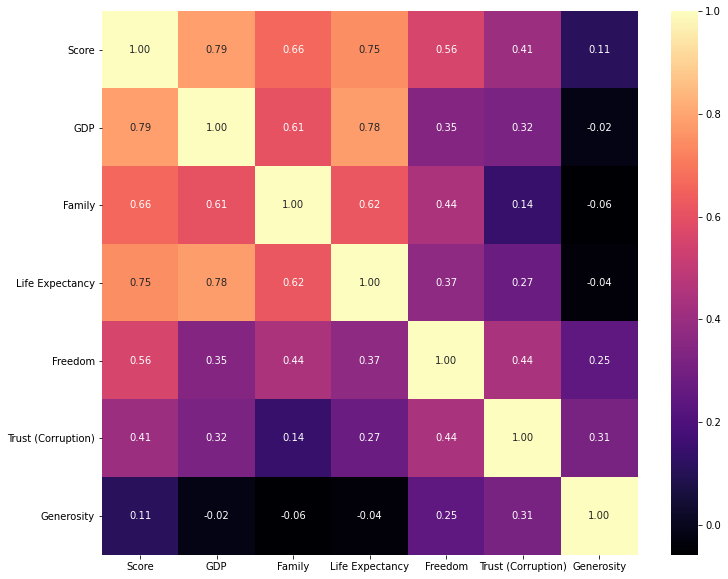

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12,10))
sns.heatmap(df_test.corr(),annot=True,cmap="magma",fmt='.2f')
plt.show()

In [ ]:

import math 
df_test['Quartile'] = np.nan

df_test.loc[df_test['Score'] > df_test['Score'].quantile(.75), 'Quartile'] = 1
df_test.loc[df_test['Score'] < df_test['Score'].quantile(.5), 'Quartile'] = 3
df_test['Quartile'] = df_test['Quartile'].replace(np.nan, 2)

# 1 es muy feliz 
# 2 es feliz
# 3 es no-feliz

df_test['Quartile']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
772    3.0
773    3.0
774    3.0
775    3.0
776    3.0
Name: Quartile, Length: 776, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


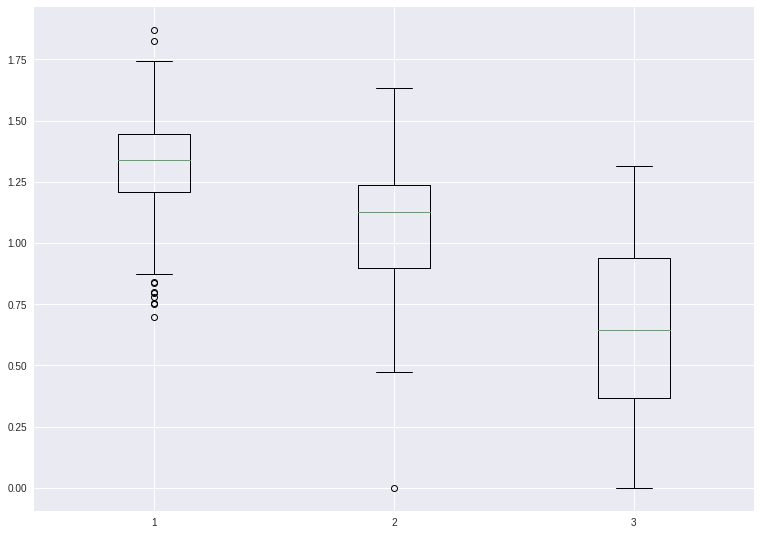

In [ ]:
# Creando los whisker plots para las 3 variables de salida para el GDP
plt.style.use('seaborn')
data_1 = df_test[df_test['Quartile'] == 1]['GDP']
data_2 = df_test[df_test['Quartile'] == 2]['GDP']
data_3 = df_test[df_test['Quartile'] == 3]['GDP']

data = [data_1, data_2, data_3]
 
fig = plt.figure(figsize =(10, 7))
 

ax = fig.add_axes([0, 0, 1, 1])
 

bp = ax.boxplot(data)
plt.show()



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


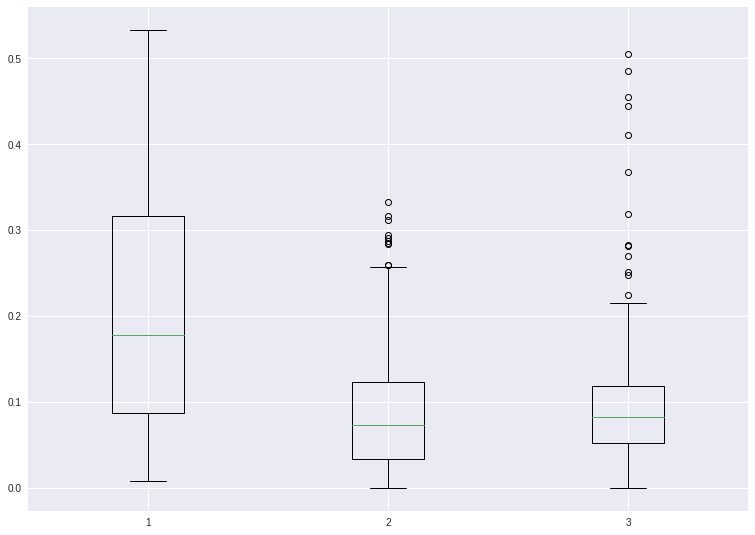

In [ ]:
# Creando los whisker plots para las 3 variables de salida para el Corruption

plt.style.use('seaborn')
data_1 = df_test[df_test['Quartile'] == 1]['Trust (Corruption)']
data_2 = df_test[df_test['Quartile'] == 2]['Trust (Corruption)']
data_3 = df_test[df_test['Quartile'] == 3]['Trust (Corruption)']

data = [data_1, data_2, data_3]
 
fig = plt.figure(figsize =(10, 7))
 

ax = fig.add_axes([0, 0, 1, 1])
 

bp = ax.boxplot(data)
plt.show()



In [ ]:
#Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score

dataset = df_test
dataset.columns = df_test.columns

#print('Shape of the dataset: ' + str(dataset.shape))
#print(dataset.head())
#print(dataset.Quartile.unique())

factor = pd.factorize(dataset['Quartile'])
dataset.species = factor[0]
definitions = factor[1]

#Splitting the data into independent and dependent variables
X = dataset[['GDP', 'Family' ,'Life Expectancy', 'Freedom' , 'Trust (Corruption)' , 'Generosity']]
y = dataset['Quartile']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train = dataset[dataset['Year'] != '2020' ].drop(['Score','Year','Quartile'], axis = 1)
X_test = dataset[dataset['Year'] == '2020' ].drop(['Score','Year','Quartile'], axis = 1)
y_train = dataset[dataset['Year'] != '2020' ]['Quartile']
y_test = dataset[dataset['Year'] == '2020' ]['Quartile']

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = { 1 : 1.0, 2: 2.0, 3: 3.0}

y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

# Making the Confusion Matrix
print(accuracy_score(y_test, y_pred))
pd.crosstab(y_test, y_pred, rownames=['Grupos Reales'], colnames=['Grupos predichos'])


0.7843137254901961


Grupos predichos,1.0,2.0,3.0
Grupos Reales,,,
1.0,29,10,2
2.0,7,24,10
3.0,0,4,67


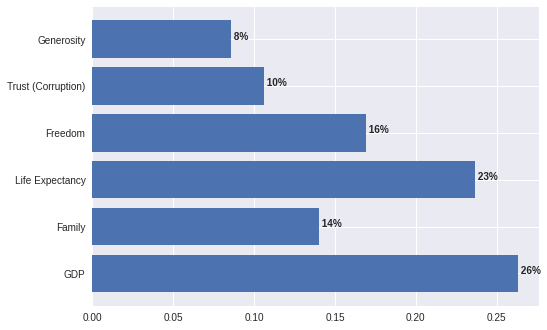

In [ ]:
plt.barh(X.columns, classifier.feature_importances_)
for index, value in enumerate(classifier.feature_importances_):
    plt.text(value, index, " " + str(int(value*100)) + "%" , fontweight='bold')


## Hyperparameter tuning 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in range(200,2000,200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Entrenando la grilla 


rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_


In [ ]:
dataset[dataset['Year'] != 2020 ].drop('Year', axis = 1)

,Score,GDP,Family,Life Expectancy,Freedom,Trust (Corruption),Generosity,Year,Quartile
0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2016,1.0
1,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2016,1.0
2,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2016,1.0
3,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2016,1.0
4,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2016,1.0
...,...,...,...,...,...,...,...,...,...
619,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,2019,3.0
620,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,2019,3.0
621,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,2019,3.0
622,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,2019,3.0


In [ ]:
len(y_test)

153

In [ ]:
X.columns

Index(['GDP', 'Family', 'Life Expectancy', 'Freedom', 'Trust (Corruption)',
       'Generosity'],
      dtype='object')

In [ ]:
classifier.feature_importances_

array([0.3344324 , 0.08865325, 0.04610893, 0.02004528, 0.05739971,
       0.03439136, 0.01328714, 0.40568192])